<a href="https://colab.research.google.com/github/Shankar-Hadimani/1000-dphi/blob/master/notebook/car_insurance_with_data_science_bootcamp_final_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a **template notebook** for the final assignment of **Getting Started With Data Science Bootcamp**

# Instructions
1.  Make sure the tasks are performed under the given heading. For example if you are doing exploratory data analysis, all the exploratory data analysis steps should be under the heading 'Exploratory Data Analysis (EDA)'
2.  You can add as many cells required under any heading.

**Note:** If any plagiarized case found, the participant will be disqualified from the bootcamp and certificate for that person won't be issued.

# Import Libraries
You can import all the libraries required here or you can import the libraries wherever you require on the go.

In [581]:
from google.colab import drive
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  roc_auc_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import lightgbm
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from datetime import datetime
from time import strptime

# Load the Dataset
Load the required train or test datasets here.

In [582]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [583]:
!ls -ltr gdrive/MyDrive/ai-ml-datasets/

total 5501
-rw------- 1 root root 5275912 Nov 23 19:37 5-celebrity-faces-dataset.zip
-rw------- 1 root root  275129 Apr 19 22:00 Train_data.csv
-rw------- 1 root root   81346 Apr 19 22:00 Test_data.csv


In [584]:
train_data = pd.read_csv('gdrive/MyDrive/ai-ml-datasets/Train_data.csv')
test_data = pd.read_csv('gdrive/MyDrive/ai-ml-datasets/Test_data.csv')

# Exploratory Data Analysis (EDA)
Perform all the exploratory data analysis steps here.

In [585]:
train_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


In [586]:
test_data.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [587]:
print('shape of the training dataset is {}'.format(train_data.shape))
print('shape of the test dataset is {}'.format(test_data.shape))

shape of the training dataset is (3102, 18)
shape of the test dataset is (935, 17)


In [588]:
train_data.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance
count,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000
mean,41.325847,0.014507,1543.067240,0.465184,0.114442,15.353965,2.356867,52.419084,0.792392,0.567376
std,11.517698,0.119587,3301.474598,0.498867,0.318399,8.164255,2.594238,109.231364,2.224740,0.495520
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,123.821352,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,589.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,0.000000,1696.000000,1.000000,0.000000,21.000000,3.000000,56.750000,1.000000,1.000000
max,92.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [589]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

In [590]:
train_data.isnull().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [ ]:
train_data['last_contact_month'].value_counts()

In [594]:
train_data['job_type'].value_counts()

management       724
blue-collar      544
technician       526
admin.           346
services         231
retired          193
unemployed       146
student          119
self-employed    106
housemaid         80
entrepreneur      76
Name: job_type, dtype: int64

In [595]:
train_data['education_level'].value_counts()

secondary    1569
tertiary     1030
primary       390
Name: education_level, dtype: int64

In [596]:
train_data['communication'].value_counts()

cellular     2397
telephone     162
Name: communication, dtype: int64

In [597]:
train_data['Outcome'].value_counts()

failure    309
success    299
other      143
Name: Outcome, dtype: int64

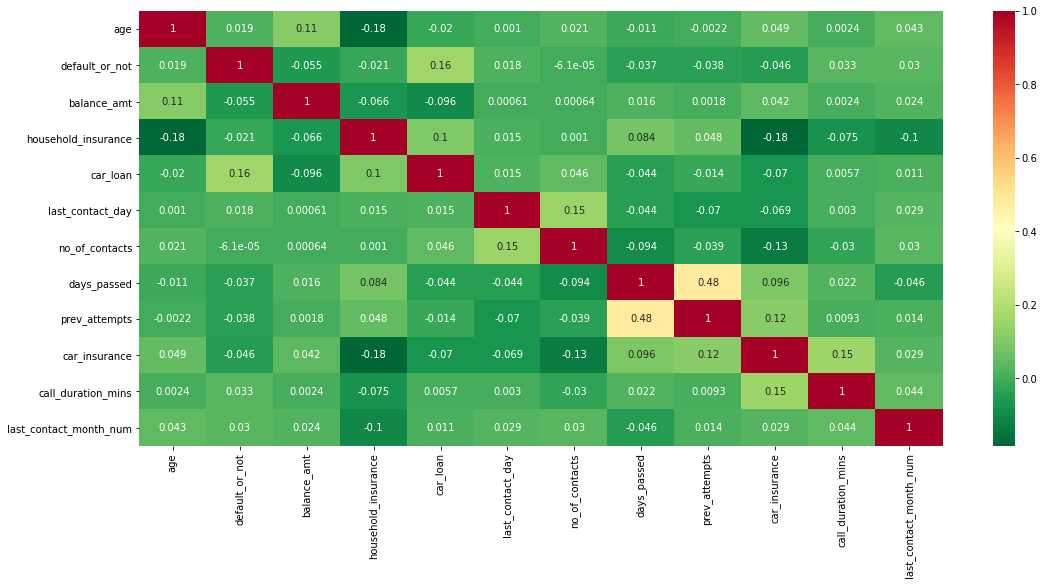

In [656]:
plt.figure(figsize=(18,8))
sns.heatmap(train_data.corr(), annot=True,cmap=plt.cm.RdYlGn_r)   
plt.show()

# Data Cleaning and Data Preprocessing
Perform all the data cleaning and data preprocessing steps here.

In [599]:
start_time = pd.to_datetime(train_data['call_start'].astype(str))
end_time = pd.to_datetime(train_data['call_end'].astype(str))
train_data['call_duration_mins']= end_time.sub(start_time).dt.total_seconds().div(60)

In [600]:
# display 
train_data['last_contact_month']=train_data['last_contact_month'].str.capitalize()
train_data['last_contact_month_num']=train_data['last_contact_month'].apply(lambda x:strptime( x,'%b').tm_mon)

In [602]:
# drop columns
train_data.drop(columns=['call_start','call_end','last_contact_month'], inplace=True)

In [604]:
# segregate label and depedent variables 
X = train_data.drop(['car_insurance'],axis=1)
y = train_data['car_insurance']

In [605]:
### check for class imbalance
train_data['car_insurance'].value_counts()

1    1760
0    1342
Name: car_insurance, dtype: int64

In [606]:
print('shape of the features', X.shape)
print('shape of the labels', y.shape)

(3102, 16)

In [610]:
### check for blank values in each feature 
train_data.isnull().sum()

age                          0
job_type                    11
marital_status               0
education_level            113
default_or_not               0
balance_amt                  0
household_insurance          0
car_loan                     0
communication              543
last_contact_day             0
no_of_contacts               0
days_passed                  0
prev_attempts                0
Outcome                   2351
car_insurance                0
call_duration_mins           0
last_contact_month_num       0
dtype: int64

In [611]:
#classify categorical and numeric features
numeric_features = X.select_dtypes(exclude=[object]).columns
categorical_features = X.select_dtypes(include=[object]).columns

In [616]:
### list of the numerical features
numeric_features

Index(['age', 'default_or_not', 'balance_amt', 'household_insurance',
       'car_loan', 'last_contact_day', 'no_of_contacts', 'days_passed',
       'prev_attempts', 'call_duration_mins', 'last_contact_month_num'],
      dtype='object')

In [617]:
### list of the categorical features
categorical_features

Index(['job_type', 'marital_status', 'education_level', 'communication',
       'Outcome'],
      dtype='object')

In [612]:
### setup pipeline for numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

In [613]:
### setup pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.NaN, strategy='constant', fill_value='most_frequent')),
    ('oneHot', OneHotEncoder(handle_unknown='ignore'))])

In [614]:
### setup column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Build Machine Learning Model & Evaluate it
Build your all the machine learning model and check their performance on the validation dataset (i.e. the test dataset that you splitted using ***train_test_split***) here.

**`Create a Baseline Model`**

In [618]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [619]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [620]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [621]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.675


In [622]:
y_pred = clf.predict(X_test)

In [624]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred, ))

[[251 192]
 [141 440]]


In [625]:
print(classification_report(y_test, y_pred,))

              precision    recall  f1-score   support

           0       0.64      0.57      0.60       443
           1       0.70      0.76      0.73       581

    accuracy                           0.67      1024
   macro avg       0.67      0.66      0.66      1024
weighted avg       0.67      0.67      0.67      1024



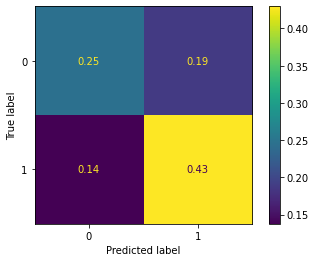

In [626]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,normalize='all') 
plt.show()

In [628]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
rfc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rfc.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [629]:
y_pred_rfc = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       443
           1       0.88      0.90      0.89       581

    accuracy                           0.87      1024
   macro avg       0.87      0.87      0.87      1024
weighted avg       0.87      0.87      0.87      1024

training score.... 1.0
test score.... 0.8720703125
AUC ROC, area under the curve... 0.8676932819960914


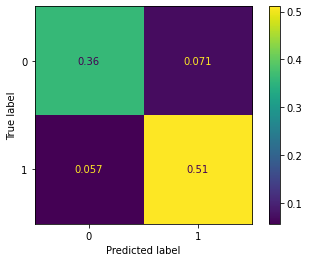

In [630]:
print(classification_report(y_test, y_pred_rfc,))
print('training score....', accuracy_score(y_train, rfc.predict(X_train)))
print('test score....', accuracy_score(y_test, rfc.predict(X_test)))
print('AUC ROC, area under the curve...', roc_auc_score(y_test,rfc.predict(X_test) ))


plot_confusion_matrix(rfc, X_test, y_test,normalize='all') 
plt.show()



In [651]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rfc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
parameters = {
    'classifier__n_estimators':[50,100,150,250,300,],
    'classifier__max_depth':[16,32,50, 70,None],
    'classifier__learning_rate':[0.1, 0.3,0.5,1],
    'classifier__num_leaves':[45,50,70,100,125, 150],
}

gcv_rfc = GridSearchCV(rfc, parameters, cv=10)
gcv.fit(X_train, y_train)

print(gcv)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [652]:
gcv.best_score_

0.8989223337049423

In [653]:
gcv.best_params_

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 32,
 'classifier__n_estimators': 150,
 'classifier__num_leaves': 70}

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       443
           1       0.89      0.89      0.89       581

    accuracy                           0.88      1024
   macro avg       0.87      0.87      0.87      1024
weighted avg       0.88      0.88      0.88      1024

training score.... 0.9971126082771896
test score.... 0.8759765625
AUC ROC, area under the curve... 0.8738164525240594


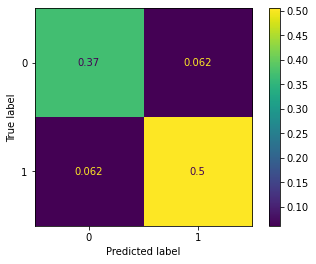

In [631]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
from lightgbm import LGBMClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score,roc_auc_score
lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lgbm.fit(X_train, y_train)
y_pred_lgb = lgbm.predict(X_test)
print(classification_report(y_test, y_pred_lgb,))
print('training score....', accuracy_score(y_train, lgbm.predict(X_train)))
print('test score....', accuracy_score(y_test, lgbm.predict(X_test)))

print('AUC ROC, area under the curve...', roc_auc_score(y_test,lgbm.predict(X_test) ))

plot_confusion_matrix(lgbm, X_test, y_test,normalize='all') 
plt.show()




In [641]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier())])
parameters = {
    'classifier__n_estimators':[5,50,100,150,250,300,],
    'classifier__max_depth':[2,3,4,8,16,32,None],
    'classifier__learning_rate':[0.03, 0.1, 0.3,0.5,1],
    'classifier__num_leaves':[5,15,30,45,50,70,100],
}

rscv = RandomizedSearchCV(lgbm, parameters, cv=10, n_iter=50, random_state=42)
rscv.fit(X_train, y_train)

print(rscv)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('preprocessor',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='drop',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('num',
                                                                               Pipeline(memory=None,
                                                                                        steps=[('imputer',
                                                                                                SimpleImputer(add_indicator=False,
                                                                                    

In [638]:
lgbm.get_params()

{'classifier': LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 'classifier__boosting_type': 'gbdt',
 'classifier__class_weight': None,
 'classifier__colsample_bytree': 1.0,
 'classifier__importance_type': 'split',
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': -1,
 'classifier__min_child_samples': 20,
 'classifier__min_child_weight': 0.001,
 'classifier__min_split_gain': 0.0,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': -1,
 'classifier__num_leaves': 31,
 'classifier__objective': None,
 'classifier__random_state': None,
 'classifier__reg_alpha': 0.0,

In [642]:
rscv.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__max_depth': 32,
 'classifier__n_estimators': 50,
 'classifier__num_leaves': 100}

In [643]:
rscv.best_score_

0.8945977331846897

In [647]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier())])
parameters = {
    'classifier__n_estimators':[50,100,150,250,300,],
    'classifier__max_depth':[16,32,50, 70,None],
    'classifier__learning_rate':[0.1, 0.3,0.5,1],
    'classifier__num_leaves':[45,50,70,100,125, 150],
}

gcv = GridSearchCV(lgbm, parameters, cv=10)
gcv.fit(X_train, y_train)

print(gcv)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [648]:
gcv.best_estimator_

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [649]:
gcv.best_params_

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 32,
 'classifier__n_estimators': 150,
 'classifier__num_leaves': 70}

In [650]:
gcv.best_score_

0.8989223337049423

# Prediction for Test Dataset (Provided by DPhi)
Predict if the customer would buy the car insurance or not on the test data provided by DPhi here.


# Saving Prediction File

### Save prediciton results locally via jupyter notebook
If you are working on Jupyter notebook, execute below block of codes. A file named 'prediction_results.csv' will be created in your current working directory.

In [ ]:
# res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
# res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
# res.columns = ["prediction"]
# res.to_csv("prediction_results.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

### Save prediction results locally via Google Colab notebook
If you are working on Google Colab Notebook, execute below block of codes. A file named 'prediction_results' will be downloaded in your system.

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', inplace = False)         
files.download('prediction_results.csv')